<a href="https://colab.research.google.com/github/KravtsovaAlyona/data_science_platform/blob/main/%D0%9A%D1%80%D0%B0%D0%B2%D1%86%D0%BE%D0%B2%D0%B0_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ФИО**: Кравцова А.Е

**Почта**: KravtsovaAE@mgpu.ru

#  Clustering 2

In [7]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from scipy.cluster import hierarchy
from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Пример: набор данных MNIST

Набор данных рукописных цифр MNIST состоит из изображений рукописных цифр вместе с метками, указывающими, какая цифра находится на каждом изображении.

Поскольку в этом наборе данных присутствуют как объекты, так и метки (а метки для больших наборов данных обычно трудно/дорого получить), этот набор данных часто используется в качестве эталона для сравнения различных методов.
Например, [эта веб-страница](http://yann.lecun.com/exdb/mnist/) описывает множество различных результатов классификации в MNIST (обратите внимание, тесты на этом веб-сайте предназначены для набора данных большего размера и с более высоким разрешением, чем мы воспользуюсь.) Чтобы увидеть сравнение методов классификации, реализованных в scikit-learn в наборе данных MNIST, см.
[эта страница](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
Набор данных MNIST также часто используется для сравнительного анализа алгоритмов кластеризации, и поскольку он имеет метки, мы можем оценить однородность или чистоту кластеров.

Существует несколько версий набора данных. Мы будем использовать тот, который встроен в scikit-learn и описан [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

* Классы: 10
* Образцы на класс: $\approx$180.
* Всего образцов: 1797
* Размерность: 64 (8 пикселей на 8 пикселей)
* Возможности: целые числа 0–16.

Вот несколько примеров изображений. Обратите внимание, что цифры нормализованы по размеру и центрированы в изображении фиксированного размера ($8\times8$ пикселей).

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


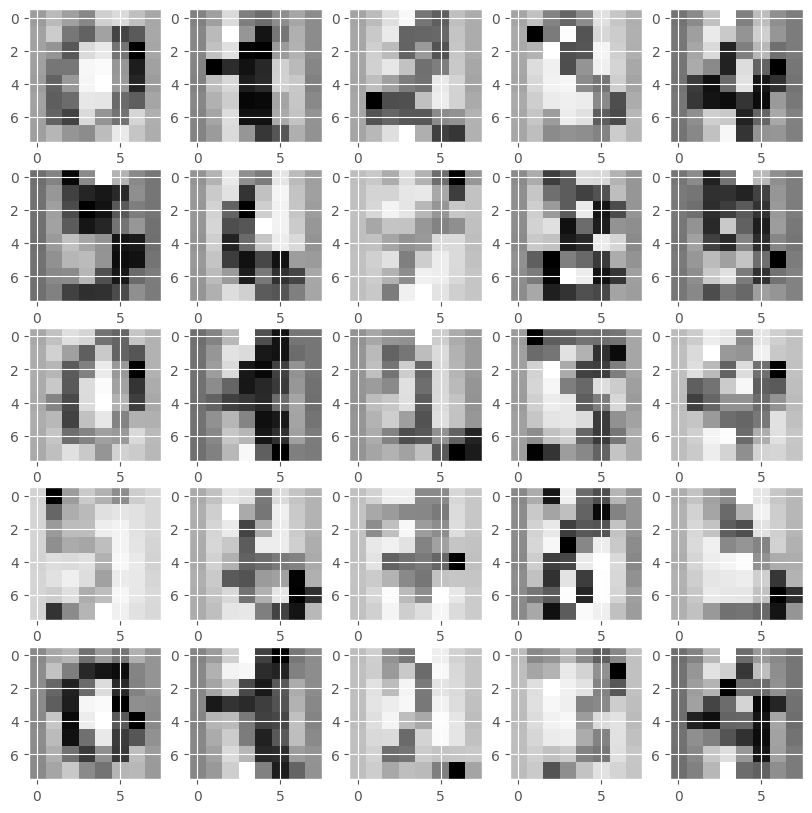

In [8]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
Сначала мы используем метод k-средних для кластеризации набора данных и вычисления показателя однородности для кластеризации.

In [9]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.597381396222485

#### Упражнение: Иерархическая кластеризация
Используйте метод иерархической кластеризации для кластеризации набора данных. Снова вычислите однородность.

*Подсказка:* Используйте функцию scikit-learn *AgglomerativeClustering*.



*   Ward минимизирует сумму квадратов разностей во всех кластерах. Это подход с минимизацией дисперсии, и в этом смысле он аналогичен целевой функции k-средних, но решается с помощью агломеративного иерархического подхода.
*   Максимальное (Maximum) или полное связывание (complete linkage) сводит к минимуму максимальное расстояние между наблюдениями пар кластеров.


*   Среднее связывание (Average linkage) минимизирует среднее расстояние между всеми наблюдениями пар кластеров.
*   Одиночная связь (Single linkage) минимизирует расстояние между ближайшими наблюдениями пар кластеров.







In [10]:
# Попробую связь с минимизацией диспресии
agg_cluster_model = AgglomerativeClustering(linkage='ward',  n_clusters=n_digits)
agg_pred = agg_cluster_model.fit_predict(X)

metrics.homogeneity_score(labels_true=y, labels_pred=agg_pred)

0.7584914070326005

Значение однородности высокое, выше однородности при использовании K-means

In [11]:
Z = hierarchy.linkage(X, 'ward') #  массив связей
print(Z[20:40])

[[ 982.          991.            2.09239578    2.        ]
 [1421.         1431.            2.10480824    2.        ]
 [1436.         1505.            2.11877776    2.        ]
 [1345.         1352.            2.12067449    2.        ]
 [1107.         1227.            2.13335114    2.        ]
 [ 567.          573.            2.17787114    2.        ]
 [1335.         1336.            2.19017997    2.        ]
 [ 164.          282.            2.19669025    2.        ]
 [ 451.          453.            2.20109268    2.        ]
 [ 943.         1028.            2.20504211    2.        ]
 [  41.          124.            2.21466841    2.        ]
 [  79.          434.            2.21629595    2.        ]
 [ 759.          761.            2.21836701    2.        ]
 [ 702.          797.            2.21840211    2.        ]
 [ 522.          620.            2.22884244    2.        ]
 [ 915.          925.            2.24667409    2.        ]
 [1386.         1809.            2.24837285    3.       

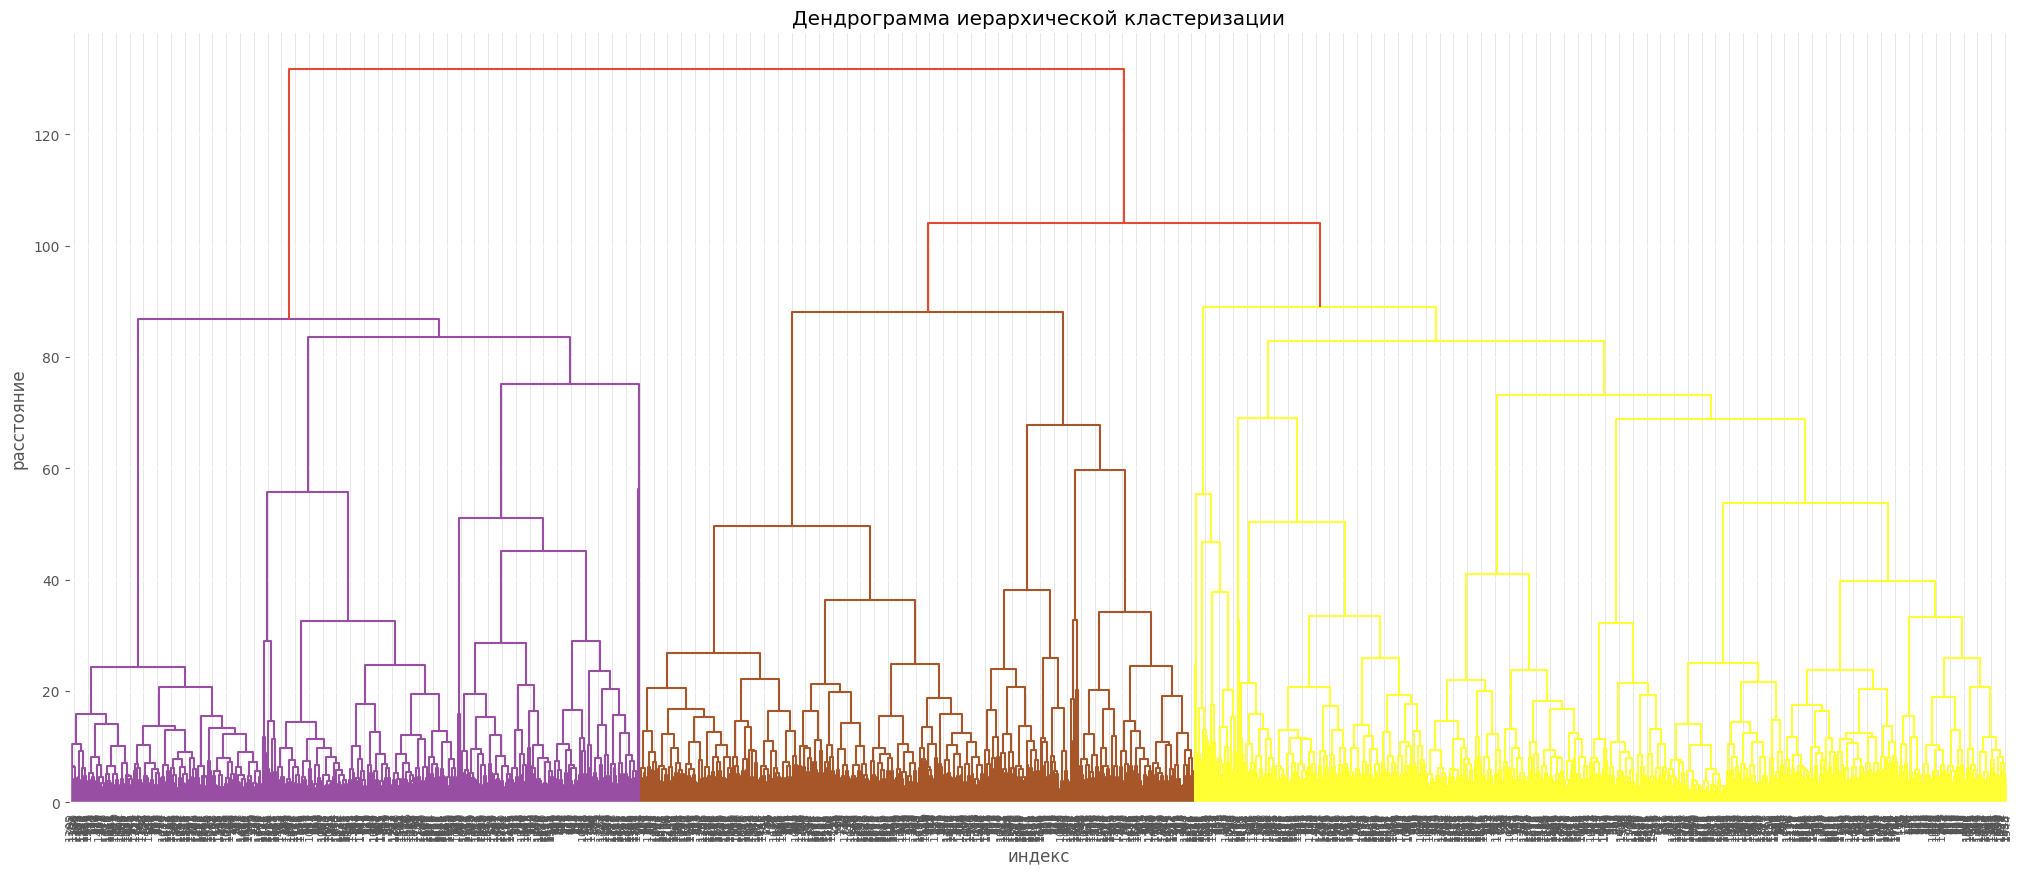

In [12]:
# График дендрограммы
plt.figure(figsize=(25, 10))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('индекс')
plt.ylabel('расстояние')
hierarchy.set_link_color_palette(color_array)
hierarchy.dendrogram(Z,
    leaf_rotation=90.,
    leaf_font_size=8.
)
plt.show()

In [13]:
# Попробую одиночную связь
agg_cluster_model2 = AgglomerativeClustering(linkage='single',  n_clusters=n_digits)
agg_pred2 = agg_cluster_model2.fit_predict(X)

metrics.homogeneity_score(labels_true=y, labels_pred=agg_pred2)

0.005578885544642584

Значение одородности сильно упало

In [14]:
# Попробую полное связывание
agg_cluster_model3 = AgglomerativeClustering(linkage='complete',  n_clusters=n_digits)
agg_pred3 = agg_cluster_model3.fit_predict(X)

metrics.homogeneity_score(labels_true=y, labels_pred=agg_pred3)

0.01684841109019543

Значение однородности подросло в сравнении с одничным типом связи, но все еще остается очень низним

#### Упражнение: DBScan

Используйте DBScan для кластеризации набора данных. Проблема, с которой вы столкнетесь, — это выбор $\epsilon$. Вы можете использовать функцию DistanceMetric, чтобы получить представление о типичных расстояниях между точками.

In [15]:
import pandas as pd
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances
df = pd.DataFrame(distances)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,9.429465,9.602031,10.347161,9.320771,10.483066,9.764437,9.368594,11.206563,9.250916,9.740384,...,9.167075,11.201947,10.214618,9.209303,11.025827,9.097838,9.804845,9.335236,9.227846,10.106628
std,3.025238,2.879556,2.702908,2.941581,2.783363,2.856713,2.930177,2.670607,2.803061,2.750411,...,2.871609,2.926652,2.738580,2.840153,2.961698,3.006655,3.004637,2.836908,2.856528,2.718451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.377907,8.445101,9.152263,8.055664,9.289648,8.457454,8.032772,10.200947,8.068446,8.527683,...,7.835470,9.791565,9.138989,7.983034,9.657150,7.529115,8.649545,8.123597,7.896166,8.822764
50%,9.269402,9.473299,10.103218,9.089083,10.210529,9.448140,9.221662,11.112941,8.837322,9.337980,...,8.838463,11.135542,9.998645,9.003926,10.920055,8.876145,9.649613,9.085757,8.921825,9.756183
75%,10.304851,10.380412,11.030820,10.050466,11.209419,10.524195,10.263819,11.886140,9.889272,10.310384,...,9.862368,12.239369,10.847290,9.905428,12.187147,10.014563,10.723950,9.988732,9.854564,10.768096
max,48.238333,48.917352,48.383393,48.996929,48.145768,49.016219,48.563717,49.503611,48.818798,49.260349,...,48.779013,47.919713,48.952603,48.931808,48.199944,48.782511,48.277673,48.703832,48.816560,48.174417


Попробую использовать значение eps=2

In [17]:
db_model = DBSCAN(eps=2.0, min_samples=2)
db_model.fit(X)
db_pred = db_model.fit_predict(X)


labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Предполагаемое количество кластеров: %d' % n_clusters_)
print('Примерное количество точек шума: %d' % n_noise_)
print("Однородность: %0.3f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.3f" % metrics.completeness_score(y, labels))
print("V-мера: %0.3f" % metrics.v_measure_score(y, labels))

Предполагаемое количество кластеров: 7
Примерное количество точек шума: 1762
Однородность: 0.020
Полнота: 0.366
V-мера: 0.038


Итак, у модели очень низкие показатели, возьму eps=4

In [18]:
db_model2 = DBSCAN(eps=4.0, min_samples=2)
db_model2.fit(X)
db_pred2 = db_model2.fit_predict(X)


labels = db_model2.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Предполагаемое количество кластеров: %d' % n_clusters_)
print('Примерное количество точек шума: %d' % n_noise_)
print("Однородность: %0.3f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.3f" % metrics.completeness_score(y, labels))
print("V-мера: %0.3f" % metrics.v_measure_score(y, labels))

Предполагаемое количество кластеров: 87
Примерное количество точек шума: 480
Однородность: 0.638
Полнота: 0.560
V-мера: 0.596


При eps=4 модель дает хорошие показатели, попробую увеличить eps до 6

In [19]:
db_model3 = DBSCAN(eps=6.0, min_samples=2)
db_model3.fit(X)
db_pred3 = db_model3.fit_predict(X)


labels = db_model3.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Предполагаемое количество кластеров: %d' % n_clusters_)
print('Примерное количество точек шума: %d' % n_noise_)
print("Однородность: %0.3f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.3f" % metrics.completeness_score(y, labels))
print("V-мера: %0.3f" % metrics.v_measure_score(y, labels))

Предполагаемое количество кластеров: 10
Примерное количество точек шума: 44
Однородность: 0.019
Полнота: 0.208
V-мера: 0.035


При увеличении eps до 6 все показатели модели упали, соответсвенно, самой лучшей и оптимальной является модель при eps=4.
При нейоднородность состовляет 63%, полнота 56% и v-мера 59,6%. Почти все данные распределены по своим кластерам, также модель гармонична.
Можно сделать вывод, что DBSCAN отлично подходит для данного набора данных

## MNIST: Другие методы кластеризации
Ознакомьтесь с методами кластеризации и опциями различных методов на [странице scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).

**Упражнение.** Изменив следующий код, попытайтесь найти для этого метод кластеризации с наибольшим показателем однородности.

In [20]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

# your code here
method = AgglomerativeClustering(n_clusters=n_digits)
compare_method(estimator=method, name="Agglomerative clustering", data=X)

method = DBSCAN(eps=4, min_samples=2)
compare_method(estimator=method, name="DBSCAN", data=X)

method=Birch(threshold=1.5, n_clusters=n_digits)
compare_method(estimator=method, name="Birch", data=X)

method=OPTICS(min_samples=67)
compare_method(estimator=method, name="OPTICS", data=X)

__________________________________________________
   method                   time      homo
                k-means++   1.24s     0.609 
           k-means random   0.10s     0.646 
 Agglomerative clustering   0.16s     0.758 
                   DBSCAN   0.03s     0.638 
                    Birch   0.25s     0.692 
                   OPTICS   2.13s     0.000 


Итак, проведя сравнительный анализ разных методов кластеризации, можно сказать, что при агломеративной иерархической кластеризации самая высокая однородность - 75,8%. Этот метод обладает высокой точностью, плюсом также является то, что не нужно самим выбирать значение k.